In [1]:
import comet_ml
from comet_ml import API

from utils.model_utils import *
from utils.plot_utils import *
from model_testing import *


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
api_key = "cX0b8GkNwZ3M1Bzj4d2oeqFmd"  # insert your API key
workspace_name = "nhl-analytics-milestone-2"

# get test data for baseline models
df_rs_bm, df_playoffs_bm = get_test_data_advanced_models()

# get test data for advanced models
df_rs_am, df_playoffs_am = get_test_data_advanced_models()

# in order to have all the predictions of the models in each figure (for regular season and playoffs)
all_predictions_rs = []
all_y_true_rs = []
all_predictions_pl = []
all_y_true_pl = []

## Add all predictions and true label data together to prepare for the figures

In [3]:
# download logistic regression models programmatically using the Python API
# specify name and version
download_model(api_key, workspace_name, model_name="logisticregressiondistancetogoal", version="1.1.0")
download_model(api_key, workspace_name, model_name="xgboost_2", version="1.2.0")
download_model(api_key, workspace_name, model_name="first-neural-network", version="1.10.0")



feature_list = [["DistanceToGoal"], ["ShootingAngle"], ["DistanceToGoal","ShootingAngle"]]
for feature in feature_list:
    # test the logistic regression:
    prediction_lr_rs, y_true_rs = predict_logreg(df_rs_am, feature)  # regular season
    prediction_lr_pl, y_true_pl = predict_logreg(df_rs_pl, feature)  # playoffs
    
    # add prediction and y_true to the lists
    all_predictions_rs.append(prediction_lr_rs)
    all_y_true_rs.append(y_true_rs.reshape(-1, 1))
    all_predictions_pl.append(prediction_lr_pl)
    all_y_true_pl.append(y_true_pl.reshape(-1, 1))

# test the neural network:
prediction_nn_rs, y_true_nn_rs = predict_neural_network(df_rs_am)  # regular season
prediction_nn_pl, y_true_nn_pl = predict_neural_network(df_playoffs_am)  # playoffs

# add prediction and y_true to the lists
all_predictions_rs.append(prediction_nn_rs)
all_predictions_pl.append(prediction_nn_pl)
all_y_true_rs.append(y_true_nn_rs)
all_y_true_pl.append(y_true_nn_pl)

# test XGBoost models:
prediction_xgb_rs, ylabel_xgb_rs = predict_xgboost(df_rs_am)  # playoffs
prediction_xgb_pl, ylabel_xgb_pl = predict_xgboost(df_playoffs_am)  # playoffs

# add prediction and y_true to the lists
all_predictions_rs.append(prediction_xgb_rs)
all_predictions_pl.append(prediction_xgb_pl)
all_y_true_rs.append(ylabel_xgb_rs)
all_y_true_pl.append(ylabel_xgb_pl)

COMET INFO: Downloading registry model 'logisticregressiondistancetogoal', version '1.1.0', stage None from workspace 'nhl-analytics-milestone-2'...
COMET INFO: Unzipping model to '/Users/miloshdevic/Documents/MILA/Science des données/Project/NHL_analytics/comet_models' ...
COMET INFO: done!
COMET INFO: Downloading registry model 'xgboost_2', version '1.2.0', stage None from workspace 'nhl-analytics-milestone-2'...
COMET INFO: Unzipping model to '/Users/miloshdevic/Documents/MILA/Science des données/Project/NHL_analytics/comet_models' ...
COMET INFO: done!
COMET INFO: Downloading registry model 'first-neural-network', version '1.10.0', stage None from workspace 'nhl-analytics-milestone-2'...
COMET INFO: Unzipping model to '/Users/miloshdevic/Documents/MILA/Science des données/Project/NHL_analytics/comet_models' ...
COMET INFO: done!


FileNotFoundError: [Errno 2] No such file or directory: 'comet_models/logistic_regression_DistanceToGoal.pkl'

# For regular season

## Plot ROC, goal rate, cumulativate proportion, and calibration plots for our 5 models (3 logistic regression models, 1 neural network model, 1 XGBoost model)

In [31]:
all_predictions_rs, all_y_true_rs

([array([0.60512   , 0.41212646, 0.52185479, ..., 0.56937281, 0.58019121,
         0.52553529]),
  array([0.49855358, 0.5016748 , 0.49853455, ..., 0.49914357, 0.49906744,
         0.49889615]),
  array([0.60204372, 0.41579619, 0.51857338, ..., 0.56751646, 0.57818263,
         0.523074  ]),
  array([9.8983790e-01, 6.1632824e-01, 5.7561080e-03, ..., 1.1048838e-03,
         5.0853420e-04, 1.9922517e-03]),
  array([9.9613661e-01, 1.5687133e-04, 6.8556750e-04, ..., 5.3730945e-04,
         5.3794641e-04, 3.1156524e-04], dtype=float32)],
 [array([[1.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]),
  array([[1.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]),
  array([[1.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]),
  array([[1],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]),
  array([[1],
         [0],
         [0],
   

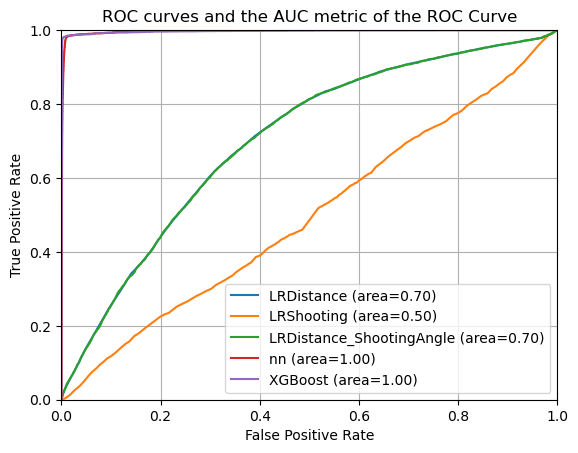

In [32]:
labels = ['LRDistance', 'LRShooting', 'LRDistance_ShootingAngle', 'nn', 'XGBoost']
linestyles = ['-', '-', '-', '-', '-']
plot_roc_curve(all_predictions_rs, all_y_true_rs, linestyles, labels)#, "roc_5models_rs")

/home/cheng-ubuntu/Documents/ift6758/project/git/utils/plot_utils.py:82: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  goal_rate_by_percentile_bin = y_val_df.groupby(by=['percentile_bin']).apply(
/home/cheng-ubuntu/Documents/ift6758/project/git/utils/plot_utils.py:82: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  goal_rate_by_percentile_bin = y_val_df.groupby(by=['percentile_bin']).apply(
/home/cheng-ubuntu/Documents/ift6758/project/git/utils/plot_utils.py:82: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain cur

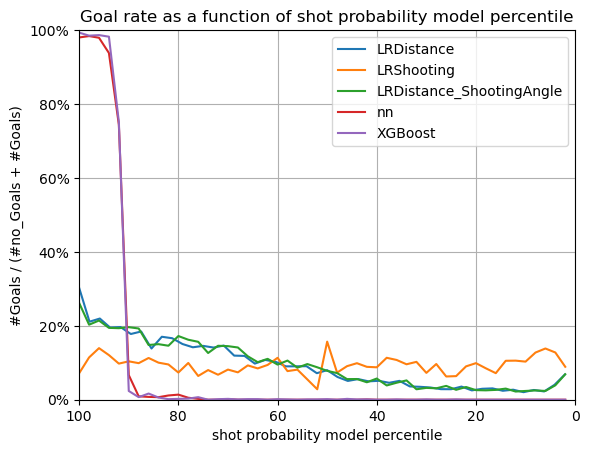

In [33]:
labels = ['LRDistance', 'LRShooting', 'LRDistance_ShootingAngle', 'nn', 'XGBoost']
linestyles = ['-', '-', '-', '-', '-']
percentile, percentile_pred, y_valid_df = shot_prob_model_percentile(all_predictions_rs[0], all_y_true_rs[0])
# print(y_valid_df.head(20))

plot_goal_rate(all_predictions_rs, all_y_true_rs, labels)#, "goal_rate_5models_rs")

/home/cheng-ubuntu/Documents/ift6758/project/git/utils/plot_utils.py:115: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_goals_by_percentile = y_val_df.groupby(by='percentile_bin').apply(
/home/cheng-ubuntu/Documents/ift6758/project/git/utils/plot_utils.py:115: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_goals_by_percentile = y_val_df.groupby(by='percentile_bin').apply(
/home/cheng-ubuntu/Documents/ift6758/project/git/utils/plot_utils.py:115: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current beha

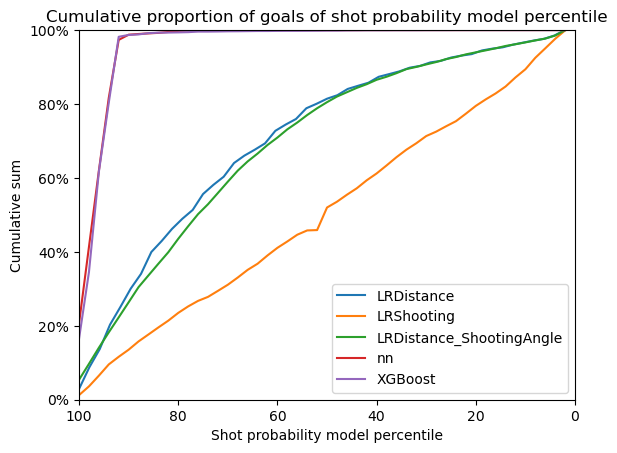

In [34]:
plot_cumulative_sum(all_predictions_rs, all_y_true_rs, labels)#, "cumulative_5models_rs")

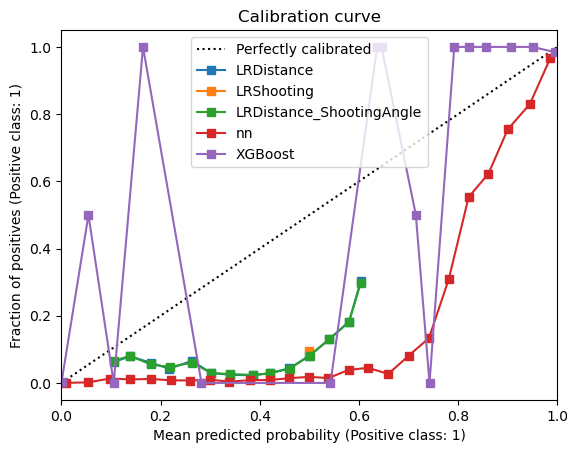

In [36]:
plot_calibration(all_predictions_rs, all_y_true_rs, labels)#, "calibration_5models_rs")

# For playoffs

## Plot ROC, goal rate, cumulativate proportion, and calibration plots for our 5 models (3 logistic regression models, 1 neural network model, 1 XGBoost model)

In [55]:
all_predictions_pl, all_y_true_pl

([array([0.4997359 , 0.45924964, 0.44827832, ..., 0.20932054, 0.21674101,
         0.12308874]),
  array([0.50154158, 0.49899131, 0.49931485, ..., 0.50165577, 0.4983823 ,
         0.5       ]),
  array([0.50324683, 0.45699077, 0.44674891, ..., 0.21174989, 0.214205  ,
         0.12302471]),
  array([1.4759881e-02, 2.1697771e-05, 9.2393180e-03, ..., 1.8075170e-02,
         5.3346254e-02, 4.5495100e-03]),
  array([1.3605334e-04, 6.5435925e-05, 6.5435925e-05, ..., 6.5435925e-05,
         5.2977332e-05, 6.5435925e-05], dtype=float32)],
 [array([[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]),
  array([[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]),
  array([[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]),
  array([[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]),
  array([[0],
         [0],
         [0],
   

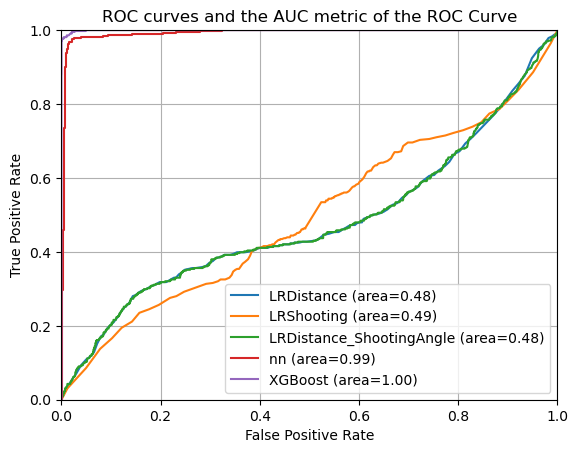

In [57]:
labels = ['LRDistance', 'LRShooting', 'LRDistance_ShootingAngle', 'nn', 'XGBoost']
linestyles = ['-', '-', '-', '-', '-']
plot_roc_curve(all_predictions_pl, all_y_true_pl, linestyles, labels)#, "roc_5models_pl")

/tmp/ipykernel_11736/2668991779.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  goal_rate_by_percentile_bin = y_val_df.groupby(by=['percentile_bin']).apply(lambda f: f['isGoal'].sum()/(len(f)+1))
/tmp/ipykernel_11736/2668991779.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  goal_rate_by_percentile_bin = y_val_df.groupby(by=['percentile_bin']).apply(lambda f: f['isGoal'].sum()/(len(f)+1))
/tmp/ipykernel_11736/2668991779.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observe

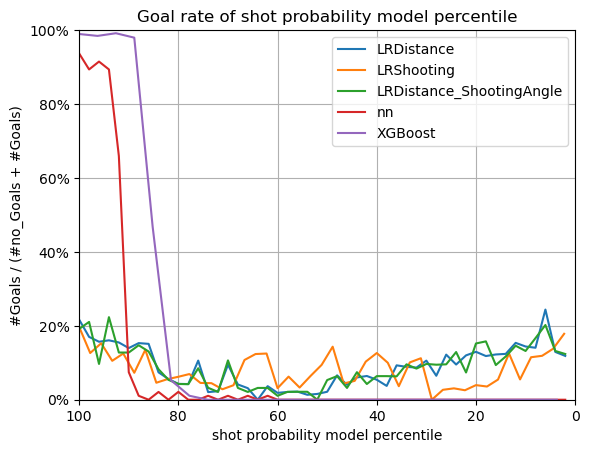

In [64]:
labels = ['LRDistance', 'LRShooting', 'LRDistance_ShootingAngle', 'nn', 'XGBoost']
linestyles = ['-', '-', '-', '-', '-']
percentile, percentile_pred, y_valid_df = shot_prob_model_percentile(pred_proba_5models_pl[0], ylabel_5models_pl[0])
# print(y_valid_df.head(20))

plot_goal_rate_5models(all_predictions_pl, all_y_true_pl, labels)#, "goal_rate_5models_pl")

/tmp/ipykernel_11736/1294267938.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_goals_by_percentile = y_val_df.groupby(by='percentile_bin').apply(lambda f: f['isGoal'].sum()/number_goal_sum)
/tmp/ipykernel_11736/1294267938.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_goals_by_percentile = y_val_df.groupby(by='percentile_bin').apply(lambda f: f['isGoal'].sum()/number_goal_sum)
/tmp/ipykernel_11736/1294267938.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=

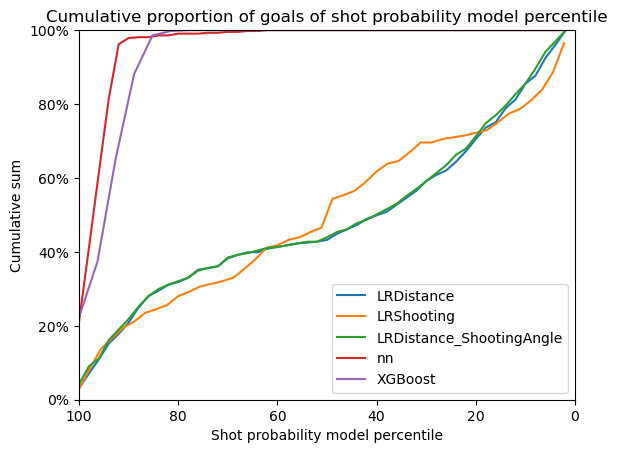

In [66]:
plot_cumulative_sum_5models(all_predictions_pl, all_y_true_pl, labels)#, "cumulative_5models_pl")

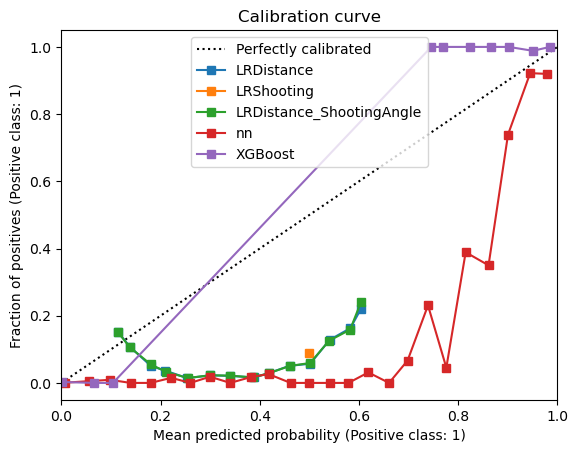

In [67]:
plot_calibration(all_predictions_pl, all_y_true_pl, labels)#, "calibration_5models_pl")

In [63]:
# def plot_goal_rate_5models(pred_probs, y_label, labels, file_name=None):
#     """
#     Create the goal rate plot
#     Args:
#         pred_probs: list of arrays, each array contains de probability of an event to be a goal
#         y_label: list of arrays, each array contains the actual label of an event
#         labels: list of strings, labels to give in the legend
#         file_name: str, if None, do nothing, if it's a string, save the figure name as the string.

#     Returns:

#     """
#     for prob, y, label in zip(pred_probs, y_label, labels):
#         percentile, percentile_pred, y_val_df = shot_prob_model_percentile(prob, y)
#         bins = np.linspace(0, 100, len(y_val_df['percentile_bin'].unique()))[1:]

#         goal_rate_by_percentile_bin = y_val_df.groupby(by=['percentile_bin']).apply(lambda f: f['isGoal'].sum()/(len(f)+1))

#         # print("Length of goal_rate_by_percentile_bin:", len(goal_rate_by_percentile_bin))
#         # print(len(bins))
#         # print("Length of index:", len(goal_rate_by_percentile_bin.index))
#         # print(goal_rate_by_percentile_bin)
#         # goal_rate_by_percentile_bin = y_val_df.groupby(by=['percentile_bin'])['isGoal'].mean()
#         if label != 'XGBoost':
#             g = sns.lineplot(x=bins, y=goal_rate_by_percentile_bin[1:]*100, label=label)
#             ax = g.axes
#             ax.yaxis.set_major_formatter(mtick.PercentFormatter(100))
#         else:
#             bins = np.linspace(0, 100, len(y_val_df['percentile_bin'].unique())+1)[1:]
#             g = sns.lineplot(x=bins, y=goal_rate_by_percentile_bin[1:]*100, label=label)
#             ax = g.axes
#             ax.yaxis.set_major_formatter(mtick.PercentFormatter(100))
#     plt.xlim(100, 0)
#     plt.ylim(0, 100)
#     plt.xlabel('shot probability model percentile')
#     plt.ylabel('#Goals / (#no_Goals + #Goals)')
#     plt.title('Goal rate of shot probability model percentile')
#     plt.grid(True)
    
#     if file_name:
#         plt.savefig(file_name)
#     plt.show()

In [65]:
# def plot_cumulative_sum_5models(pred_probs, y_label, labels, file_name=None):
#     """
#     Create cumulative sum of goals plot
#     Args:
#         pred_probs: list of arrays, each array contains de probability of an event to be a goal
#         y_label: list of arrays, each array contains the actual label of an event
#         labels: list of strings, labels to give in the legend
#         file_name: str, if None, do nothing, if it's a string, save the figure name as the string.

#     Returns:

#     """
#     for prob, y, label in zip(pred_probs, y_label, labels):
#         percentile, percentile_pred, y_val_df = shot_prob_model_percentile(prob, y)
#         number_goal_sum = (y==1).sum()
#         sum_goals_by_percentile = y_val_df.groupby(by='percentile_bin').apply(lambda f: f['isGoal'].sum()/number_goal_sum)
#         cumu_sum_goals = sum_goals_by_percentile[::-1].cumsum(axis=0)[::-1]
#         bins = np.linspace(0, 100, len(y_val_df['percentile_bin'].unique()))[1:]
#         if label != 'XGBoost':
#             g = sns.lineplot(x=bins, y=cumu_sum_goals[1:]*100, label=label)
#             ax = g.axes
#             ax.yaxis.set_major_formatter(mtick.PercentFormatter(100))
#         else:
#             bins = np.linspace(0, 100, len(y_val_df['percentile_bin'].unique())+1)[1:]
#             g = sns.lineplot(x=bins, y=cumu_sum_goals[1:]*100, label=label)
#             ax = g.axes
#             ax.yaxis.set_major_formatter(mtick.PercentFormatter(100))
#     plt.xlim(100, 0)
#     plt.ylim(0, 100)
#     plt.xlabel('Shot probability model percentile')
#     plt.ylabel('Cumulative sum')
#     plt.title('Cumulative proportion of goals of shot probability model percentile')
    
#     if file_name:
#         plt.savefig(file_name)
#     plt.show()